# Structure learning in decomposable graphical models

## Gaussian graphical models (GGMs)

In [39]:
import numpy as np
import pandas as pd
import trilearn.smc as smc
np.random.seed(2)

Read (centralized around origo) data from file

In [58]:
df = pd.read_csv("sample_data/dataset_p15.csv", header=None)

In [59]:
df.shape

(100, 15)

In [60]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.268878,0.109906,-0.353295,-1.077679,-0.707938,-3.356246,-1.899697,-1.572408,-1.363449,0.387727,-1.100505,-0.583745,0.582096,0.332725,-1.072969
1,0.717418,0.889198,0.793387,1.966528,0.753154,-0.399547,0.531658,0.207708,0.779332,1.288162,0.215957,0.541811,0.309820,1.210676,0.042214
2,1.064512,1.587411,0.138867,0.363370,0.503868,1.193544,0.182134,-0.597229,0.219855,0.189130,0.921610,-0.414998,0.224087,0.966131,-0.845206


Generate particle Gibbs trajectory of graphs 

In [63]:
graph_traj = smc.gen_pgibbs_ggm_trajectory(dataframe=df, n_particles=50, n_samples=1000)

Particle Gibbs samples: 100%|██████████| 1000/1000 [10:13<00:00,  1.63it/s]


Inspect the likelihood, and the auto-correlation (on graph size) plots to determine the burn-in period

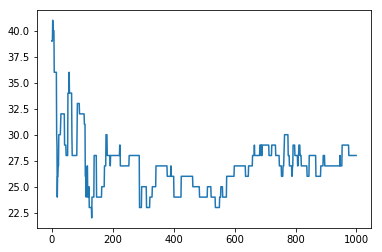

In [64]:
graph_traj.autocorrelation_size().plot()

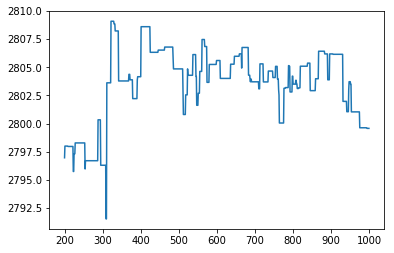

In [77]:
graph_traj.likelihood()[200:].plot()

Plot the heatmap based on the samples after the burnin period

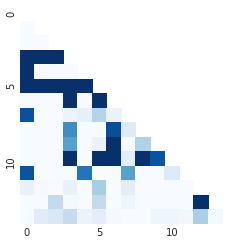

In [67]:
graph_traj.plot_heatmap(from_index=200)

## Discrete log-linear models

Read data from file, where the first two rows, [0, 1], of the file should specify the labels and the levels of the corresponding variables. The outcomes are assumed to be 

In [70]:
df_discrete = pd.read_csv("sample_data/czech_autoworkers.csv", header=[0, 1])

In [71]:
df_discrete.shape

(1841, 6)

In [72]:
df_discrete.head(3)

,A,B,C,D,E,F
,2,2,2,2,2,2
0,1,1,1,0,0,0
1,1,1,1,0,0,0
2,1,1,1,0,0,0


Generate particle Gibbs trajectory of graphs

In [73]:
graph_traj_discrete = smc.gen_pgibbs_loglin_trajectory(dataframe=df_discrete, n_particles=50, n_samples=1000)

Particle Gibbs samples: 100%|██████████| 1000/1000 [03:22<00:00,  4.94it/s]


Inspect the likelihood and the auto-correlation (on graph size) plots to determine the burn-in period

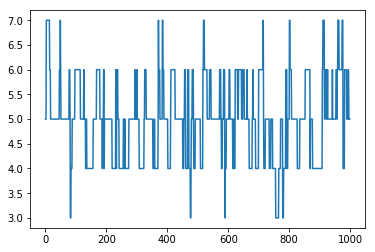

In [74]:
graph_traj_discrete.autocorrelation_size().plot()

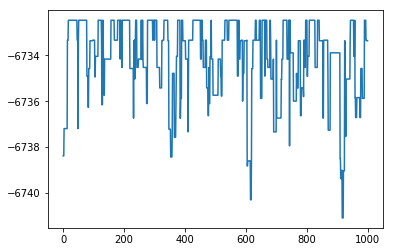

In [75]:
graph_traj_discrete.likelihood().plot()

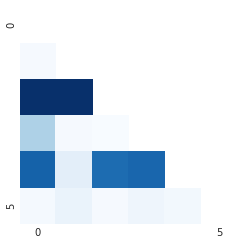

In [76]:
graph_traj_discrete.plot_heatmap(from_index=0)

## Simulate junction trees and decomposable graphs

In [19]:
from trilearn.graph import junction_tree as jt

In [20]:
from trilearn.graph import junction_tree_collapser as jtcol, junction_tree_expander as jtexp

Sample a junction tree with the Christmas tree algorithm as

In [21]:
tree = jt.sample(internal_nodes=5)

In [22]:
tree.nodes

NodeView((frozenset([0, 1, 2, 3]), frozenset([0, 2, 4])))

In [23]:
tree.edges

EdgeView([(frozenset([0, 1, 2, 3]), frozenset([0, 2, 4]))])

Expand the tree by the vertex 5

In [24]:
exp_tree = jtexp.sample(tree, 5)

In [25]:
exp_tree.nodes

NodeView((frozenset([5]), frozenset([0, 1, 2, 3]), frozenset([0, 2, 4])))

In [26]:
exp_tree.edges

EdgeView([(frozenset([5]), frozenset([0, 2, 4])), (frozenset([0, 1, 2, 3]), frozenset([0, 2, 4]))])

Collapse the nex tree by the vertex 5

In [36]:
col_tree = jtcol.sample(exp_tree, 5)

In [37]:
col_tree.nodes

NodeView((frozenset([0, 1, 2, 3]), frozenset([0, 2, 4])))

Get the underlying decomposable graph

In [29]:
graph = tree.to_graph()

In [30]:
graph.nodes()

NodeView((0, 1, 2, 3, 4))

In [31]:
graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (2, 4)])

# Estimate the number of decomposable graphs

In [32]:
import trilearn.smc as smc

The following command estimates the number of decomopsable graphs

In [33]:
p = 20
n_graphs = smc.est_n_dec_graphs(p, n_particles=1000)
n_graphs

Const estimates: 100%|██████████| 1/1 [00:18<00:00, 18.06s/it]


array([1.00000000e+00, 2.00000000e+00, 7.92400000e+00, 5.87432533e+01,
       8.45215334e+02, 1.87678926e+04, 5.75827317e+05, 3.09019997e+07,
       2.05005539e+09, 2.18507988e+11, 2.96711710e+13, 4.99592550e+15,
       1.11350311e+18, 3.07365530e+20, 1.77348195e+23, 8.79418996e+25,
       5.43477633e+28, 4.43421648e+31, 5.82771541e+34, 8.16946103e+37])

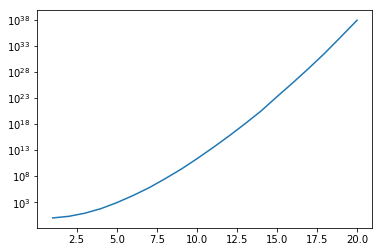

In [34]:
import matplotlib.pyplot as plt
plt.semilogy(range(1,p+1), n_graphs)